### Heat Map code for Vision Zero Paper ###
by Richard Sowers and Daniel Carmody

* Richard Sowers <r-sowers@illinois.edu> <https://publish.illinois.edu/r-sowers/>
* Daniel Carmody <dcarmod2@illinois.edu>


Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license.

In [1]:
from matplotlib import pylab as plotter
%matplotlib inline
import osmnx
import networkx
import pandas
import numpy
import time
import itertools
import importlib
import MAIN_config_hour_of_day as config
#import MAIN_config_seasons as config

In [2]:
d=0
windower=config.windower(d)

Manhattan evening and morning


In [3]:
eps=0.01

In [4]:
osmnx.config(log_file=True, log_console=True, use_cache=True)
G_raw = osmnx.graph_from_place('Manhattan Island, New York, USA', network_type='drive')

In [5]:
#G=networkx.DiGraph(G_raw)
G=G_raw.copy()

### heat map of accidents ###

In [7]:
accidents_raw=config.accidents()
accidents_raw.head()

,Borough,Latitude,Longitude,node,datetime
4,MANHATTAN,40.701505,-74.012551,370880739,2014-05-15 01:50:00
8,MANHATTAN,40.701783,-74.011166,42431902,2014-01-31 18:00:00
9,MANHATTAN,40.701783,-74.011166,42431902,2014-08-08 01:00:00
10,MANHATTAN,40.701783,-74.011166,42431902,2014-08-11 19:00:00
12,MANHATTAN,40.701783,-74.011166,42431902,2014-02-14 23:45:00


In [8]:
accidents=accidents_raw.copy()
accidents=accidents.set_index("node",drop=True)
accidents.head()

,Borough,Latitude,Longitude,datetime
node,,,,
370880739,MANHATTAN,40.701505,-74.012551,2014-05-15 01:50:00
42431902,MANHATTAN,40.701783,-74.011166,2014-01-31 18:00:00
42431902,MANHATTAN,40.701783,-74.011166,2014-08-08 01:00:00
42431902,MANHATTAN,40.701783,-74.011166,2014-08-11 19:00:00
42431902,MANHATTAN,40.701783,-74.011166,2014-02-14 23:45:00


In [9]:
temp=accidents.groupby(level="node").size()
networkx.set_node_attributes(G,0,"accident_count")
for node,count in temp.iteritems():
    try:
        G.node[node]["accident_count"]=count
    except Exception:
        pass

In [10]:
numpy.random.seed(0)
for node in G.node:
    G.node[node]["accident_count"]+=eps*numpy.random.random()

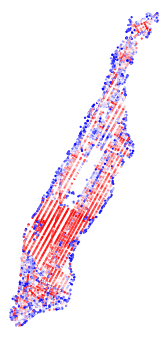

(<Figure size 269.369x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28ee5f21668>)

In [11]:
accident_colors = osmnx.get_node_colors_by_attr(G, "accident_count",
                                                cmap="bwr")
osmnx.plot_graph(G, node_color=accident_colors, node_size=5,
                 node_zorder=3,edge_color="#FFFFFF")

### heat maps of origins and destinations ###

In [12]:
trips_raw=config.trips()
trips_raw.head()

,origin_node,destination_node,origin_datetime,destination_datetime
39528,42443329,4461990857,2016-03-11 21:38:00-05:00,2016-03-11 21:54:00-05:00
65695,42428458,42428212,2016-03-03 23:06:00-05:00,2016-03-03 23:14:00-05:00
12598,42428491,42430217,2016-03-18 22:52:00-04:00,2016-03-18 22:57:00-04:00
202107,42424672,42439409,2016-03-01 20:30:00-05:00,2016-03-01 20:37:00-05:00
44919,42444829,42429754,2016-03-24 00:53:00-04:00,2016-03-24 00:58:00-04:00


In [13]:
trips=trips_raw.copy()
trips=trips.set_index(["origin_node","destination_node"],drop=True)
trips.head()

,,origin_datetime,destination_datetime
origin_node,destination_node,,
42443329,4461990857,2016-03-11 21:38:00-05:00,2016-03-11 21:54:00-05:00
42428458,42428212,2016-03-03 23:06:00-05:00,2016-03-03 23:14:00-05:00
42428491,42430217,2016-03-18 22:52:00-04:00,2016-03-18 22:57:00-04:00
42424672,42439409,2016-03-01 20:30:00-05:00,2016-03-01 20:37:00-05:00
42444829,42429754,2016-03-24 00:53:00-04:00,2016-03-24 00:58:00-04:00


In [14]:
temp=trips.groupby(level="origin_node").size()
networkx.set_node_attributes(G,0,"origin_count")
for node,count in temp.iteritems():
    try:
        G.node[node]["origin_count"]=count
    except Exception:
        pass
    
#slightly randomize so that can compute quantiles
numpy.random.seed(0)
for node in G.node:
    G.node[node]["origin_count"]+=eps*numpy.random.random()

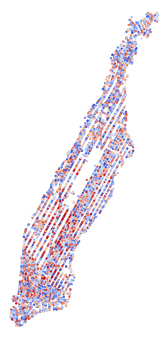

(<Figure size 269.369x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28ee351a358>)

In [15]:
origin_colors = osmnx.get_node_colors_by_attr(G,
                                              "origin_count", cmap="coolwarm")
#osmnx.plot_graph(G, fig_height=6, node_color=origin_colors, node_size=1,
#                           node_zorder=2, edge_color='#dddddd')
osmnx.plot_graph(G, node_color=origin_colors,node_size=5,
                 node_zorder=3,edge_color="#FFFFFF")

In [16]:
temp=trips.groupby(level="destination_node").size()
networkx.set_node_attributes(G,0,"destination_count")
for node,count in temp.iteritems():
    try:
        G.node[node]["destination_count"]=count
    except Exception:
        pass
    
#slightly randomize so that we can compute quantiles
numpy.random.seed(0)
for node in G.node:
    G.node[node]["destination_count"]+=eps*numpy.random.random()

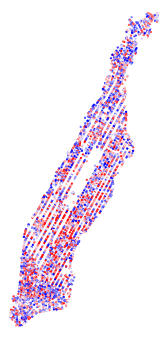

(<Figure size 269.369x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28ee5f4c978>)

In [17]:
destination_colors = osmnx.get_node_colors_by_attr(G, "destination_count", cmap="bwr")
osmnx.plot_graph(G, node_color=destination_colors,node_size=5,
                 node_zorder=3,edge_color="#FFFFFF")

### heat map of pace ###

In [18]:
traveltimes_raw=config.traveltimes()
traveltimes_raw.head()

,begin_node,end_node,datetime,travel_time
0,42421728,42435337,2013-12-31 23:00:00,20.4412
1,42421728,42432736,2013-12-31 23:00:00,24.6495
2,42421728,42435337,2013-12-31 22:00:00,10.5158
3,42421728,42432736,2013-12-31 22:00:00,13.0787
4,42421728,42435337,2013-12-31 21:00:00,11.4267


In [19]:
traveltimes=traveltimes_raw.copy()

In [20]:
traveltimes=traveltimes.set_index(["begin_node","end_node"],drop=True)
traveltimes.head()

datetime  travel_time
begin_node end_node                                 
42421728   42435337 2013-12-31 23:00:00      20.4412
           42432736 2013-12-31 23:00:00      24.6495
           42435337 2013-12-31 22:00:00      10.5158
           42432736 2013-12-31 22:00:00      13.0787
           42435337 2013-12-31 21:00:00      11.4267

In [21]:
#average the traveltimes for each edge (in case of multiple trips)
networkx.set_edge_attributes(G,numpy.nan,"pace")
edge_times=traveltimes["travel_time"].groupby(level=["begin_node","end_node"]).mean()

#set pace along each edge
#want color map to reflect high values for slow traffic;
#pace does this
tic=time.clock()
for ((begin_node,end_node),edge_time) in edge_times.iteritems():
    #print(begin_node,end_node,edge_time)
    try:
        pace=edge_time/G.edges[begin_node,end_node,0]["length"]
        G.edges[begin_node,end_node,0]["pace"]=pace
    except Exception:
        pass
toc=time.clock()
print(str(toc-tic)+" seconds required")

0.27374728205128207 seconds required


In [22]:
average_pace=numpy.nanmean([d["pace"] for _,d in G.edges.items()])
print(average_pace)

0.2146864454309155


In [23]:
#for coloring reasons,
# fill in unknown paces with average pace
# slightly randomize pace so that we can compute quantiles
numpy.random.seed(0)

tic=time.clock()
for edge,edgedict in G.edges.items():
    edge_pace=edgedict["pace"]
    if numpy.isnan(edge_pace):
        edge_pace=average_pace
    G.edges[edge]["pace"]=edge_pace+eps*numpy.random.random()
toc=time.clock()
print(str(toc-tic)+" seconds required")

0.1825173333333332 seconds required


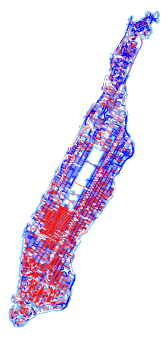

(<Figure size 269.369x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28ee61a0630>)

In [24]:
speed_colors = osmnx.get_edge_colors_by_attr(G,"pace",cmap="bwr")
osmnx.plot_graph(G, edge_color=speed_colors)